In [78]:
import requests
import pandas as pd
import numpy as np

In [79]:
headers = {'User-Agent': 'joanoliverperez96@gmail.com'}

companyTickers = requests.get(
    'https://www.sec.gov/files/company_tickers.json', headers=headers
)

In [81]:
firstEntry = companyTickers.json()['0']
directCIK = firstEntry['cik_str']

In [82]:
companyData = pd.DataFrame.from_dict(companyTickers.json(), orient='index')


In [83]:
companyData['cik_str'] = companyData['cik_str'].astype(str).str.zfill(10)
companyData.set_index('cik_str', inplace=True, drop=True)
companyData

cik_str   ticker                             title
0     0000320193     AAPL                        Apple Inc.
1     0000789019     MSFT                    MICROSOFT CORP
2     0001652044    GOOGL                     Alphabet Inc.
3     0001018724     AMZN                    AMAZON COM INC
4     0001045810     NVDA                       NVIDIA CORP
...          ...      ...                               ...
9014  0001699880    AMRLF            American Lithium Corp.
9015  0001723580    BFIIW      BurgerFi International, Inc.
9016  0001806524    LGHLW            Lion Group Holding Ltd
9017  0001821850  SUNL-WT  Sunlight Financial Holdings Inc.
9018  0001932737    NWTNW                        NWTN, Inc.

[9019 rows x 3 columns]

In [134]:
companyData.head(12)

ticker                                      title
cik_str                                                     
0000320193   AAPL                                 Apple Inc.
0000789019   MSFT                             MICROSOFT CORP
0001652044  GOOGL                              Alphabet Inc.
0001018724   AMZN                             AMAZON COM INC
0001045810   NVDA                                NVIDIA CORP
0001318605   TSLA                                Tesla, Inc.
0001326801   META                       Meta Platforms, Inc.
0001067983  BRK-B                     BERKSHIRE HATHAWAY INC
0001403161      V                                  VISA INC.
0001046179    TSM  TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD
0000731766    UNH                     UNITEDHEALTH GROUP INC
0000019617    JPM                        JPMORGAN CHASE & CO

In [123]:
companyData.loc["0000789019"]['ticker']

'MSFT'

In [133]:
df = {}
for cik in companyData.index[0:10]:
    print(companyData.loc[cik]['ticker'])
    fillingMetadata = requests.get(f'https://data.sec.gov/submissions/CIK{cik}.json', headers=headers)
    companyFacts = requests.get(f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json', headers=headers)
    companyDataPoints = list(companyFacts.json()['facts']['us-gaap'].keys())
    companyConcepts = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/{companyDataPoints[20]}.json', headers=headers)
    df[cik] = pd.DataFrame.from_dict(companyConcepts.json()['units']['USD'])

AAPL
MSFT
cik_str
0001652044    GOOGL
0001652044     GOOG
Name: ticker, dtype: object
AMZN
NVDA
TSLA
META
cik_str
0001067983    BRK-B
0001067983    BRK-A
Name: ticker, dtype: object
V
TSM


KeyError: 'us-gaap'

In [129]:
df

cik_str          AAPL          MSFT
0  0000320193           NaN           NaN
1  0000789019  3.957200e+10           NaN
2  0001652044           NaN           NaN
3  0001018724  3.617100e+10  4.928000e+10
4  0001045810           NaN           NaN
5  0001318605  5.385100e+10           NaN
6  0001326801           NaN           NaN
7  0001067983           NaN  5.567600e+10
8  0001403161           NaN           NaN
9  0001046179           NaN           NaN

In [ ]:
cik = companyData[0:1].cik_str[0]

In [85]:
fillingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json', headers=headers
)

In [86]:
fillingMetadata.json().keys()

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])

In [87]:
allForms = pd.DataFrame.from_dict(
    fillingMetadata.json()['filings']['recent']
)

In [135]:
companyFacts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{"0000731766"}.json', headers=headers
)

In [138]:
companyFacts.json()

{'cik': 731766,
 'entityName': 'UnitedHealth Group Incorporated',
 'facts': {'dei': {'EntityCommonStockSharesOutstanding': {'label': 'Entity Common Stock, Shares Outstanding',
    'description': "Indicate number of shares or other units outstanding of each of registrant's classes of capital or common stock or other ownership interests, if and as stated on cover of related periodic report. Where multiple classes or units exist define each class/interest by adding class of stock items such as Common Class A [Member], Common Class B [Member] or Partnership Interest [Member] onto the Instrument [Domain] of the Entity Listings, Instrument.",
    'units': {'shares': [{'end': '2009-07-30',
       'val': 1162420963,
       'accn': '0001193125-09-167160',
       'fy': 2009,
       'fp': 'Q2',
       'form': '10-Q',
       'filed': '2009-08-06',
       'frame': 'CY2009Q2I'},
      {'end': '2009-10-27',
       'val': 1162016644,
       'accn': '0001193125-09-222100',
       'fy': 2009,
       'fp

In [139]:
companyDataPoints = list(companyFacts.json()['facts']['us-gaap'].keys())

In [96]:
companyConcepts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/{companyDataPoints[20]}.json', headers=headers
)

In [140]:
companyDataPoints

['AccountsPayableAndAccruedLiabilitiesCurrent',
 'AccountsReceivableNetCurrent',
 'AccruedSalariesCurrent',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax',
 'AcquiredFiniteLivedIntangibleAssetAmount',
 'AcquiredFiniteLivedIntangibleAssetWeightedAverageUsefulLife',
 'AdditionalPaidInCapital',
 'AdditionalPaidInCapitalCommonStock',
 'AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivitiesOther',
 'AllocatedShareBasedCompensationExpense',
 'AllocatedShareBasedCompensationExpenseNetOfTax',
 'AllowanceForDoubtfulAccountsReceivable',
 'AllowanceForDoubtfulAccountsReceivableCurrent',
 'AllowanceForDoubtfulOtherReceivablesCurrent',
 'AmortizationOfIntangibleAssets',
 'AntidilutiveSecuritiesExcludedFromComputa

In [105]:
df = pd.DataFrame.from_dict(companyConcepts.json()['units']['USD'])
df.head()

end          val                  accn    fy  fp    form  \
0  2008-09-27  39572000000  0001193125-09-153165  2009  Q3    10-Q   
1  2008-09-27  39572000000  0001193125-09-214859  2009  FY    10-K   
2  2008-09-27  36171000000  0001193125-10-012091  2009  FY  10-K/A   
3  2008-09-27  36171000000  0001193125-10-238044  2010  FY    10-K   
4  2009-06-27  48140000000  0001193125-09-153165  2009  Q3    10-Q   

        filed      frame  
0  2009-07-22        NaN  
1  2009-10-27        NaN  
2  2010-01-25        NaN  
3  2010-10-27  CY2008Q3I  
4  2009-07-22  CY2009Q2I

In [106]:
df.set_index('end', inplace=True, drop=True)

<AxesSubplot:xlabel='end'>

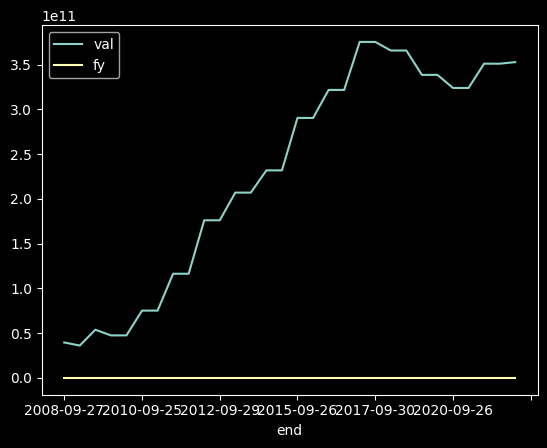

In [108]:
df.loc[df['form']=='10-K'].plot()

In [92]:
pd.DataFrame.from_dict(
    companyConcepts.json()['units']['USD'],
)

start         end           val                  accn    fy  fp  \
0   2015-09-27  2016-09-24  215639000000  0000320193-18-000145  2018  FY   
1   2016-09-25  2016-12-31   78351000000  0000320193-18-000145  2018  FY   
2   2017-01-01  2017-04-01   52896000000  0000320193-18-000145  2018  FY   
3   2017-04-02  2017-07-01   45408000000  0000320193-18-000145  2018  FY   
4   2016-09-25  2017-09-30  229234000000  0000320193-18-000145  2018  FY   
5   2017-07-02  2017-09-30   52579000000  0000320193-18-000145  2018  FY   
6   2017-10-01  2017-12-30   88293000000  0000320193-18-000145  2018  FY   
7   2017-12-31  2018-03-31   61137000000  0000320193-18-000145  2018  FY   
8   2018-04-01  2018-06-30   53265000000  0000320193-18-000145  2018  FY   
9   2017-10-01  2018-09-29  265595000000  0000320193-18-000145  2018  FY   
10  2018-07-01  2018-09-29   62900000000  0000320193-18-000145  2018  FY   

    form       filed     frame  
0   10-K  2018-11-05    CY2016  
1   10-K  2018-11-05  CY2016Q4  
2   10-K  2018-11-05  CY2017Q1  
3   10-K  2018-11-05  CY2017Q2  
4   10-K  2018-11-05    CY2017  
5   10-K  2018-11-05  CY2017Q3  
6   10-K  2018-11-05  CY2017Q4  
7   10-K  2018-11-05  CY2018Q1  
8   10-K  2018-11-05  CY2018Q2  
9   10-K  2018-11-05    CY2018  
10  10-K  2018-11-05  CY2018Q3

In [93]:
companyDataPoints

['AccountsPayable',
 'AccountsPayableCurrent',
 'AccountsReceivableNetCurrent',
 'AccruedIncomeTaxesCurrent',
 'AccruedIncomeTaxesNoncurrent',
 'AccruedLiabilities',
 'AccruedLiabilitiesCurrent',
 'AccruedMarketingCostsCurrent',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax',
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax',
 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue',
 'AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation',
 'AdvertisingExpense',
 'AllocatedShareBasedCompensationExpense',
 'AllowanceForDoubtfulAccountsReceivableCurrent',
 'AmortizationOfIntangibleAssets',
 'AntidilutiveSecuritiesExcluded